In [0]:
#lineone:InceptionV3 model is used avgpool layer (last before layer) of the architecture is extracted and used for prediction
#http://image-net.org/about-stats
#https://arxiv.org/abs/1409.1556
#default input size for model is 299x299
#below code has been tested and executed only in colab.research.google.com .Please make sure you have enabled GPU from notebook settings before execution

In [2]:
#for visualising VGG19 model
!pip install -q pydot-ng
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 28 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,121 kB of archives.
After this operation, 2

Selecting previously unselected package libpixman-1-0:amd64.
Preparing to unpack .../08-libpixman-1-0_0.34.0-1_amd64.deb ...
Unpacking libpixman-1-0:amd64 (0.34.0-1) ...
Selecting previously unselected package libxcb-render0:amd64.
Preparing to unpack .../09-libxcb-render0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-render0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-shm0:amd64.
Preparing to unpack .../10-libxcb-shm0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libcairo2:amd64.
Preparing to unpack .../11-libcairo2_1.14.10-1ubuntu1_amd64.deb ...
Unpacking libcairo2:amd64 (1.14.10-1ubuntu1) ...
Selecting previously unselected package libltdl7:amd64.
Preparing to unpack .../12-libltdl7_2.4.6-2_amd64.deb ...
Unpacking libltdl7:amd64 (2.4.6-2) ...
Selecting previously unselected package libthai-data.
Preparing to unpack .../13-libthai-data_0.1.26-3_all.deb ...
Unpacking libthai-data (0.1.26-

Setting up libxaw7:amd64 (2:1.0.13-1) ...
Setting up libpangoft2-1.0-0:amd64 (1.40.12-1) ...
Setting up libpangocairo-1.0-0:amd64 (1.40.12-1) ...
Setting up libgvc6 (2.38.0-16ubuntu2) ...
Setting up graphviz (2.38.0-16ubuntu2) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...


In [0]:
import pydot_ng
import graphviz

In [4]:
#make sure you are importing preprocess_input and decode_predictions from inceptionv3 model
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input
from keras.applications.inception_v3 import preprocess_input,decode_predictions
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
#For visualising picture
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
input_tensor=Input(shape=(299,299,3))
#you can give custom input with input_tensor

In [0]:
base_model=InceptionV3(input_tensor=input_tensor,weights='imagenet',include_top=True)

In [0]:
from keras.models import Model

In [0]:
#avg_pool
model=Model(inputs=base_model.input,outputs=base_model.get_layer('avg_pool').output)

In [0]:
#image is loaded from url
#you can use imread to load loacally 
from urllib.request import urlopen

In [0]:
#url of the image is stored in url_link1
#(299,299) is the target size of Inceptionv3 model
urllink=urlopen("https://5.imimg.com/data5/OX/YI/MY-19292667/green-color-sharpener-500x500.jpg")
img=image.load_img(urllink,target_size=(299,299))
import numpy as np

In [0]:
#preprocessing input image
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [0]:
#its not possible to give predictions from fc1 layer immediately ;only after passing it through softmax layer (assigning probabilities) we can use predict function to classify 
#in order to add layer you need to take a sequential initialized model and then add fc1 model along with it 

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
#sequential model is initialised with model2
model2=Sequential()
#fc1 layer is added in a sequential manner to model2
model2.add(model)
#adding softmax layer for prediction
model2.add(Dense(1000,activation='softmax'))

In [0]:
#input is provided to model to predict the class
predictions=base_model.predict(x)

In [16]:
predictions.shape

(1, 1000)

In [17]:
#decode_predictions decodes the values of predict and provides the output
print("predict:",decode_predictions(predictions,top=2)[0])

predict: [('n03908714', 'pencil_sharpener', 0.9998223), ('n03908618', 'pencil_box', 9.05254e-06)]


In [0]:
#predictions listed given image is a pencil_sharpner with highest probability and then pencil_box at next probability 
#you can also increase the number of predictions by increasing the values of top to 3,4.. in "print("predict:",decode_predictions(predictions,top=4))""

In [0]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

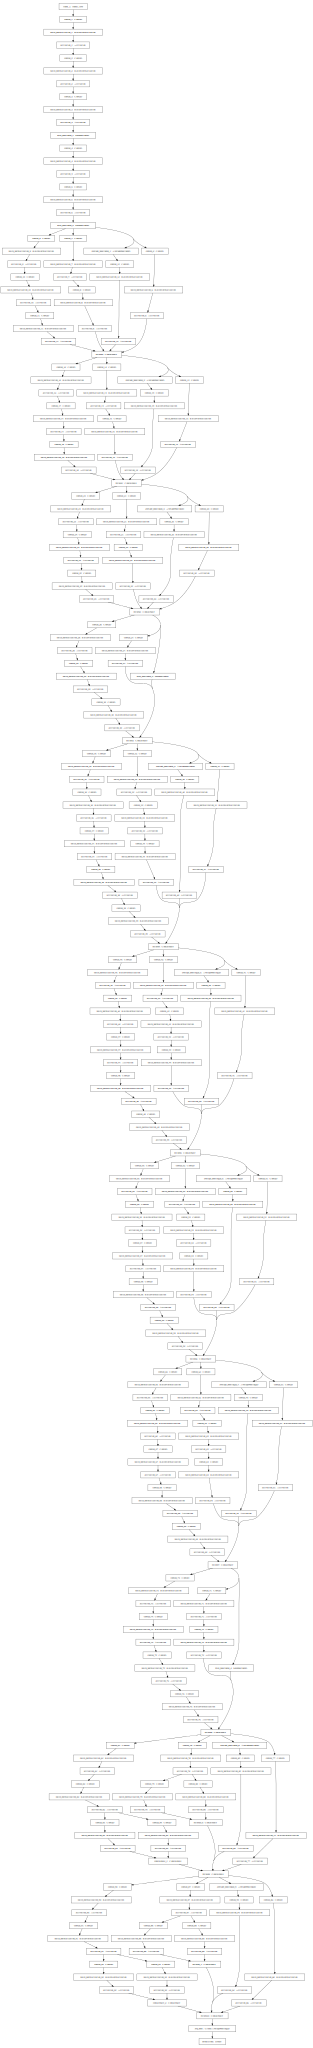

In [20]:
#model of base_model(complete VGG19)
SVG(model_to_dot(base_model).create(prog='dot',format='svg'))

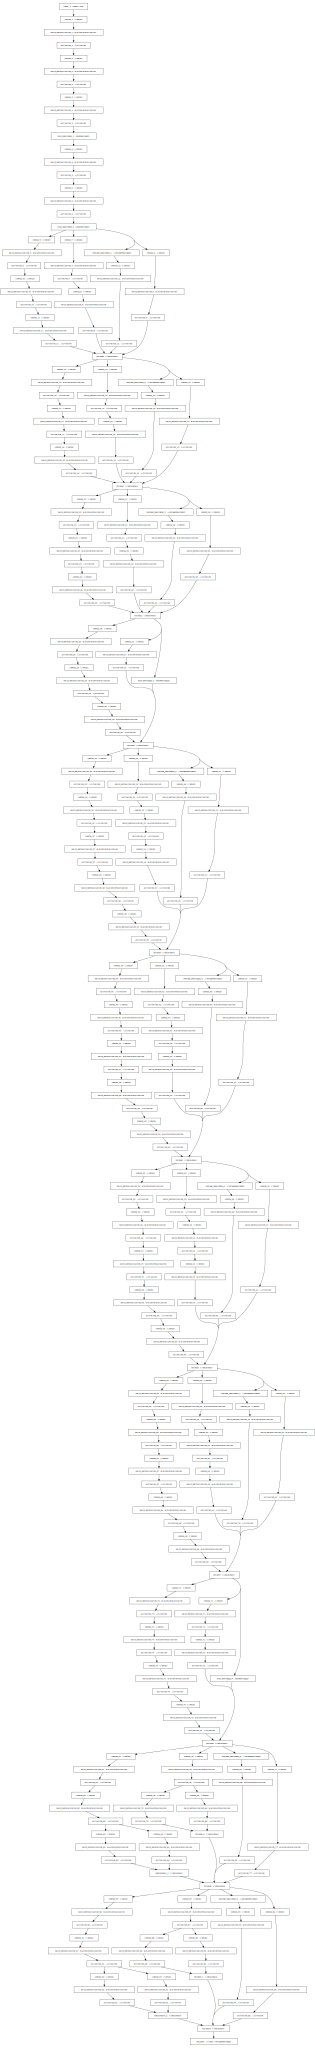

In [21]:
#below you can see that model contains blocks till 'avg_pool' layer (model)
#extracted model
SVG(model_to_dot(model).create(prog='dot',format='svg'))

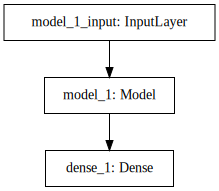

In [23]:
#after addition of dense1 layer for softmax prediction(model+softmax) 
#(extracted layer+ softmax)--->predictions
SVG(model_to_dot(model2).create(prog='dot',format='svg'))